

# Project: Investigate a Dataset - [No-Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#data_cleaning">Data Cleanning</a></li>
<li><a href="#optimization">Data Optimization</a></li>        
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href='#Q1'>Which Gender has the highest level of commitment to appointments?</a>
 <li><a href='#Q2'>Which neighbourhoods have the highest level of attendance to appointments?</a>
 <li><a href='#Q3'>what is the percentage of people with scholarship in the data set who attended the appointments</a>     
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitation">Limitations</a></li>        
</ul>

<a id='intro'></a>
## Introduction
The No-Show Appointments dataset was chosen based on my main interest trying to understand whether payment for a service can change a consumer's behaviour (it can be observed direclty in question 3 of this analysis). The fact that Brazil is the chosen country in the dataset also helps us understand some of the programs conducted in Latin America region where most governments try to nationalize most of the public service in the country. Understanding the demographics of Brazil (like Gender and Neighbourhood distributions) can help us build more behavioural conclusions if this dataset can be paired with other datasets; like having a salary column with consumption on goods, all of this can play a crucial part to build more structured analysis.  
The charts that were used in this analysis are pie chart and bar charts, since most of the questions are adressed on categorical basis with low number of categories, Bar charts and pie charts can play a crucial role helping us understand the difference between different categories.
### Dataset Description 

The No-Show Appointments Dataset collects information from 100k medical appointments in Brazil, it's focused on whether or not the patients showed for the appointments. This data is collected in a timeframe of less than 2 months. The No-show column indicates whether the patient showed to the appointment or not, based on that this column was used as the independent variable. Check the columns below for a better understanding  

| id | name          | description                 |
|----|---------------|-----------------------------|
|0| PatientId | the patient's identifier|
|1| AppointmentID | Appointment Identifier|
|2| Gender|The patient's gender|
|3| ScheduledDay | The day they called to schedule|
|4|AppointmentDay| The day they will have to attend the doctor|
|5|Age| the age of the patient|
|6|Neighbourhood|Where the appointment takes place|
|7|Scholarship |the patient receives government family allowance(yes or no)|
|8|Hipertension| Does the patient have Hipertension (yes or no)|
|9|Diabetes|Does the patient have Diabetes (yes or no)|
|10|Alcoholism|Does the patient have alcohol addiction (yes or no)|
|11|Handcap|is the patient handicapped? (yes or no)|
|12|SMS_received|The patient received 1 or more sms message|
|13|No-show| The patient didn't show to the appointment (yes or no)|

### Question(s) for Analysis

1- Which Gender has the highest level of commitment to appointments?  
2- Which neighbourhoods have the highest level of attendance to appointments?  
3- What is the percentage of people with scholarship in the dataset?


In [6]:
#importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



<a id='wrangling'></a>
## Data Wrangling



In [9]:
#loading data
df = pd.read_csv('./KaggleV2-May-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


the head function gives me a quick look on how the data is structured

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The info method allows me to understand which columns might require optimization based on the content of each column, whether we need to change the data type of a specific column

In [11]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Note how the nunique method above revealed to us that the Handcap is having 5 different values where it is supposed to have only 2, since it's a true or false column (I will tackle this in the data cleaning section)

In [12]:
df.shape # this is to help us understand only the size of the dataframe

(110527, 14)

I used the Shape method in order to understand the how big the data set is. this way when I find any errors I can estimate the percentage of the discrepancy within the data set, this will make it easier for me to take the decision of dropping values and so on.

In [13]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


using the describe method I can have an overview over the data set, for example I can see that th min in the age column is -1, I will investigate that and check how many times it's repeated to understand what went wrong there. (in the data cleaning section)

In [14]:
print(df.duplicated().sum())

0


Checking for any duplicates in the data set, no duplicates are shown so no cleaning here is required

In [15]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In the method above (isnull) I checked for the possibility of having any missing values in the dataset. No nulls, so no cleaning on this side is required.

In [16]:
df['Age'].max() #checking for the max value in Age column

115

the Age column showed a value of -1 which is an incorrect value, I want to make sure that this column has been collected in a proper way, an approach I will use is to check how many patients have an age between 90 years old and 115(the max value of that column that I checked previously using the numpy max method, I will check that using an added variable. I will count that variable then divide it by the total number of rows in the Age column

In [17]:
age_90to115 = df[(df['Age'] >= 90) & (df['Age'] <= 115)]

count_age90to115 = age_90to115['Age'].count() #counting the number of rows between 90 to 115

In [18]:
total_count = df['Age'].count() #counted the total number of rows in Age column

In [19]:
my_percentage = (count_age90to115 / total_count) * 100 #calculated the percentage

print(f"Percentage {my_percentage:.2f}%") #printing the percentage

Percentage 0.38%


the Percentage is very low (0.38%) which helps me assume that the column Age was captured correctly except for the -1 value we saw earlier

Finally, I check the time span on which this data is presented

In [21]:
df['AppointmentDay'].min()

'2016-04-29T00:00:00Z'

In [22]:
df['AppointmentDay'].max()

'2016-06-08T00:00:00Z'

<a id='data_cleaning'></a>
### Data Cleaning
 

First, I will start by removing the row where the Age is -1 sine that's a wrong Value, I will query that row first.

In [23]:
df.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


Now that I know which row that is, I will use the index to drop that row

In [24]:
df.drop(99832, inplace=True)

In [25]:
df.query('Age == -1') #checking if the row got dropped

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Now, going back to the Handcap column where there are more values than True or False (referred to as 1 or 0) I need to check for the count of those extraordinary values

In [26]:
df.Handcap.value_counts()

Handcap
0    108285
1      2042
2       183
3        13
4         3
Name: count, dtype: int64

As you can see, around 199 values are neither 0 or 1, the amount of 200 is very small that we can ignore them by dropping those rows as well

In [27]:
df = df[(df['Handcap'] == 0) | (df['Handcap'] == 1)]
#using or operator to filter by only the rows where Handcap is equal to 0 or 1
df.reset_index(drop=True, inplace=True) #dropping the values on the original dataset


Checking for the values in the Handcap column, we can see we are left with 0 and 1

In [28]:
df.Handcap.value_counts()

Handcap
0    108285
1      2042
Name: count, dtype: int64

<a id='optimization'></a>
### Optimizing columns datatypes

In this sub-section I will optimize the data, will start by making all the true/false columns categorical, data optimization is used to make the code run faster and require less memory space

In [29]:
range_of_columns = df.columns[7:14] #assiging columns to a range
df[range_of_columns] = df[range_of_columns].astype('category') #assiging them category
df.dtypes #showing their datatypes

PatientId          float64
AppointmentID        int64
Gender              object
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood       object
Scholarship       category
Hipertension      category
Diabetes          category
Alcoholism        category
Handcap           category
SMS_received      category
No-show           category
dtype: object

Will also change the Gender datatype to category

In [30]:
df['Gender'] = df['Gender'].astype('category')
df.dtypes

PatientId          float64
AppointmentID        int64
Gender            category
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood       object
Scholarship       category
Hipertension      category
Diabetes          category
Alcoholism        category
Handcap           category
SMS_received      category
No-show           category
dtype: object

Now the dates related columns should have a date type in order to make it easier to manipulate in the future

In [31]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                       category
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                  category
Hipertension                 category
Diabetes                     category
Alcoholism                   category
Handcap                      category
SMS_received                 category
No-show                      category
dtype: object

The Age column has a dataype of int64 which is too much for a column that contains only 3 digits, also it has only positive values, so I will assign it an uint8 datatype

In [32]:
df['Age'] = df['Age'].astype('uint8')
df['Age'].dtype

dtype('uint8')

Based on the nunique method used earlier the Neighbourhood column has 81 unique values, which is relatively low, based on that I can also change this column datatype to Category

In [33]:
df['Neighbourhood'] = df['Neighbourhood'].astype('category')
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                       category
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             uint8
Neighbourhood                category
Scholarship                  category
Hipertension                 category
Diabetes                     category
Alcoholism                   category
Handcap                      category
SMS_received                 category
No-show                      category
dtype: object

Now all the Data columns have been optimizied, the wrong rows have been droped and cleaned. I can start with the Data analysis now.

<a id='eda'></a>
## Exploratory Data Analysis

<a id='Q1'></a>
### Question 1: Which Gender has the highest level of commitment to appointments?

1d explorations will include understanding the distribution of males and females within the dataset

In [34]:
df.groupby(['Gender']).size() #understanding the amount of males and females in the dataset

C:\Users\Pc\AppData\Local\Temp\ipykernel_17028\1641047098.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Gender']).size() #understanding the amount of males and females in the dataset


Gender
F    71730
M    38597
dtype: int64

We can see that Females are the majority within our dataset

C:\Users\Pc\AppData\Local\Temp\ipykernel_17028\1402386697.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_counts = df.groupby('Gender').size().plot(kind='bar',title='Count of Males and Females',xlabel='Gender',ylabel='Count');


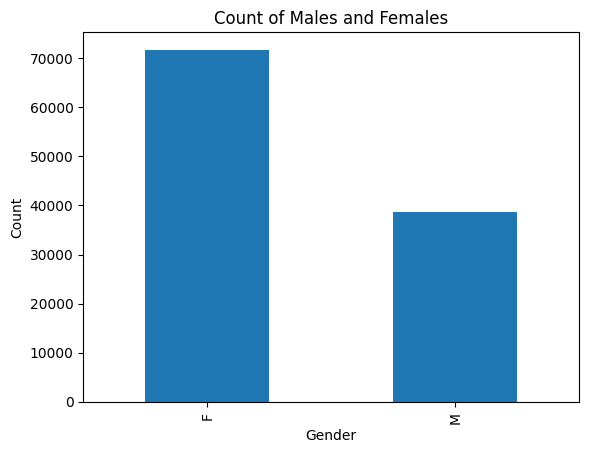

In [39]:
gender_counts = df.groupby('Gender').size().plot(kind='bar',title='Count of Males and Females',xlabel='Gender',ylabel='Count');

We can see how Females count is way larger than Males count with over 70k datapoints belonging to Females vs a little less than 40k observations that are males

To avoid repetitive code, a function will be defined to count the number of genders 

In [40]:
def count_by_category(column, category): #Parameters are: 1- Column name
                                                    #2- category in that column (like M and F in gender)
                                        
    return df[df[column]==category].shape[0]

In [41]:
Total_male = count_by_category('Gender','M')
Total_male

38597

After knowing the total number of males, I need to know the number of males that didn't show (No-show = Yes)| Also, to avoid repetitive code a function will be defined

In [42]:
def count_no_show_by_column(column,category, yes_or_no):
    """
    Parameters are the column,category, and the yes or no on the no show column
    it will return the number of a specific gender who meet a yes or no criterea
    on the no-show column
    """
    return df[(df[column] == category) & (df['No-show'] == yes_or_no)].shape[0]


In [43]:
Male_No_Show = count_no_show_by_column('Gender',"M", "Yes")
Male_No_Show

7710

Now, calculate the percentage of males that didn't show to the appointment out of all males

In [44]:
Males_no_show_percentage = (Male_No_Show/Total_male)*100
print(f" Males Percentage: {Males_no_show_percentage:.3f}%")

 Males Percentage: 19.976%


Will apply the same thing to Females

In [45]:
Total_female = count_by_category('Gender','F')
Total_female

71730

In [46]:
Female_No_Show = count_no_show_by_column('Gender',"F", "Yes")
Female_No_Show

14568

In [47]:
Females_no_show_percentage = (Female_No_Show/Total_female)*100
print(f" Females Percentage: {Females_no_show_percentage:.3f}%")

 Females Percentage: 20.309%


Since we are handling percentages with low amount of options (Yes or No) we can use the pie charts to show the percentage of Males that didn't show to the appointment, and the perccentage of females that didn't show to the appointment. (I will address that by creating a function)

In [48]:
def column_no_show(column,category): #  Parameters:
                                #column : The column to filter by (Ex: Gender)
                                #category: The category to filter by (Ex: M or F in gender)
                                #The function was made to avoid rewriting the code in male and female
    gender_data = df[df[column] == category]
    gender_data['No-show'].value_counts().plot(kind='pie',autopct='%1.3f%%',title = f'{category} in {column} No-show')

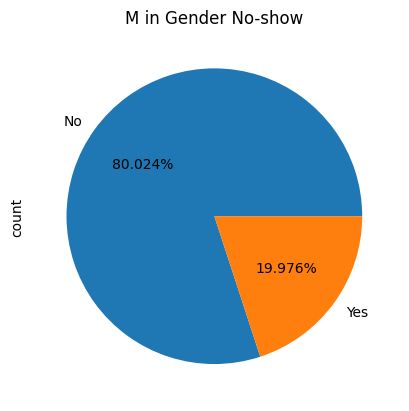

In [49]:
column_no_show('Gender','M')

We can see that around 80% of males were commited to their appointment and showed up while around 20% didn't show to their appointments

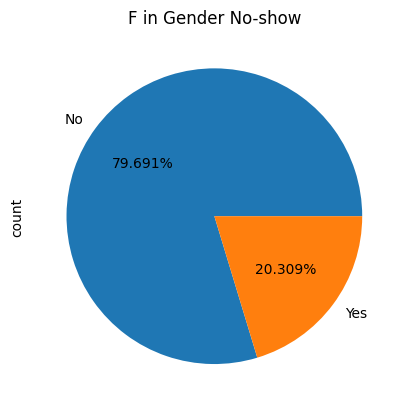

In [50]:
column_no_show('Gender','F')

Similar to Males, Females score a close percentage, around 79.6% of females showed up to their appointments while around 20% didn't.

<a id='Q2'></a>
### Research Question 2 : Which neighbourhoods have the highest level of attendance to appointments?

First, lets take a look at the population per neighbourhood, will use the value counts method to check for that

In [51]:
neighbourhood_counts = df['Neighbourhood'].value_counts()
print(neighbourhood_counts)

Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4420
JARDIM DA PENHA                3872
ITARARÉ                        3507
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64


Since the Neighbourhoods have different populations, it will make no sense to compare between them using the absolute number of patients who attended their appointments, so the correct way will be to compare between the neighbourhoods using the percentage of attendance.

In [52]:
# I will use Lambda to help me calculate the percentage using the mean method
neighbourhood_attendance = df.groupby('Neighbourhood')['No-show'].apply(lambda x: (x == 'No').mean() * 100)
#I groupedby using the neighbourhood column and the No-show column, applied lambda to iterate over the ones that showed No in the No-show column
#of course to make the data more readable I have to sort it first in Descending order
sort_neighbourhood = neighbourhood_attendance.sort_values(ascending=False)
sort_neighbourhood

C:\Users\Pc\AppData\Local\Temp\ipykernel_17028\161262891.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  neighbourhood_attendance = df.groupby('Neighbourhood')['No-show'].apply(lambda x: (x == 'No').mean() * 100)


Neighbourhood
PARQUE INDUSTRIAL              100.000000
ILHA DO BOI                     91.428571
AEROPORTO                       87.500000
MÁRIO CYPRESTE                  85.444744
SOLON BORGES                    85.287846
                                  ...    
ITARARÉ                         73.738238
SANTA CLARA                     73.465347
SANTA CECÍLIA                   72.544643
SANTOS DUMONT                   71.036107
ILHAS OCEÂNICAS DE TRINDADE      0.000000
Name: No-show, Length: 81, dtype: float64

Due to the large number of neighbourhoods, using any graph will make it hard to read, because of that, I will use the bar chart to visualize the top 15 neighbourhoods in terms of level of attendance

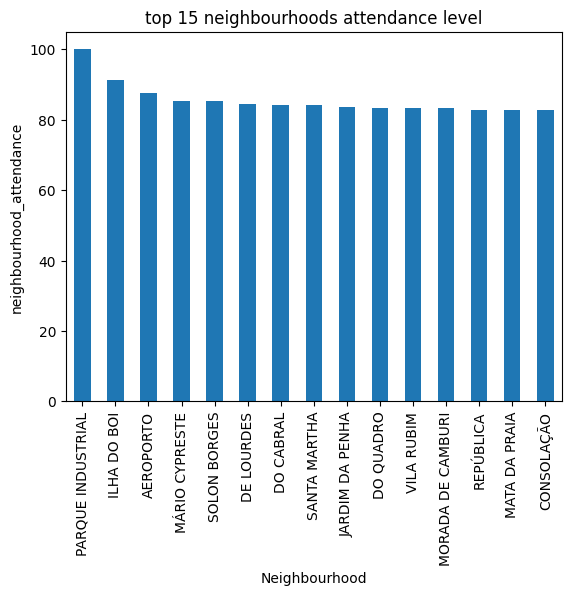

In [53]:
top_neighbourhoods = sort_neighbourhood.head(15)
top_neighbourhoods.plot(kind='bar',title='top 15 neighbourhoods attendance level',xlabel='Neighbourhood',ylabel='neighbourhood_attendance');

The top 15 neighbourhoods have over 85% attendance rate with Parque Industrial being the highest with 100% attendance rate, the limitations will be adressed later

<a id='Q3'></a>
### Question 3: what is the percentage of people with scholarship in the data set who attended the appointments

Fianlly, what is the percentage of people with scholarship in the data set? to calculate that I need to divide the number of people with scholarship by the total number of people in the dataset

In [54]:
Total_No_of_people = len(df)
Total_No_of_people

110327

Now, Number of people with Scholarship (Scholarship =1)

In [55]:
people_with_scholarship = (df['Scholarship'] == 1).sum()
people_with_scholarship

10843

C:\Users\Pc\AppData\Local\Temp\ipykernel_17028\1021710105.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  scholarship_counts = df.groupby('Scholarship').size().plot(kind='bar',title='Scholarship count',xlabel='Scholarship',ylabel='Count')


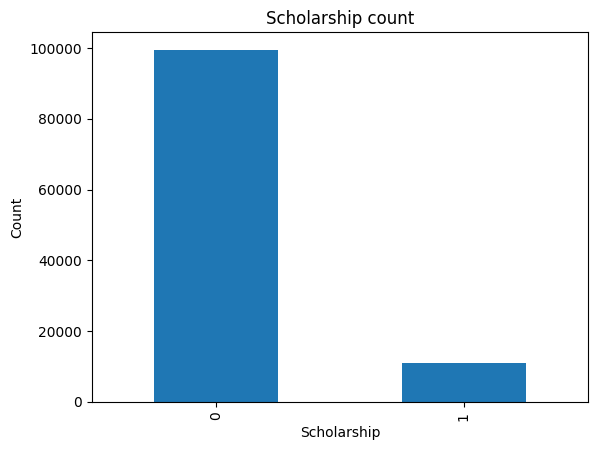

In [56]:
scholarship_counts = df.groupby('Scholarship').size().plot(kind='bar',title='Scholarship count',xlabel='Scholarship',ylabel='Count')

Number 1 on the X-axis indicates that the person had a scholarship, while Number 0 indicates that the person didn't have a scholarship at the moment this dataset was collected, around 10k people did receive the scholarship and almost 100k people had no scholarship from the government

Now, I calculate the percentage

In [57]:
percentage_with_scholarship = (people_with_scholarship/Total_No_of_people)*100
print(f"People with scholarship percentage: {percentage_with_scholarship:.2f}%")
#Percentage calculations is straight forward, the number of people with
#Scholarship divided by the total number of people in the dataset

People with scholarship percentage: 9.83%


To visualize that with a pie chart

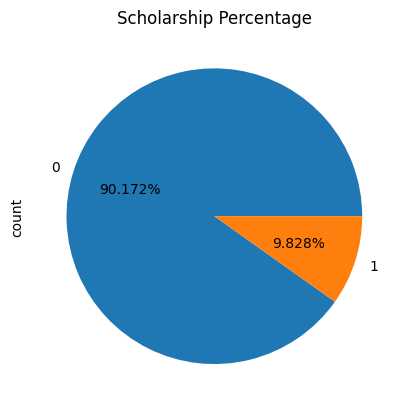

In [58]:
df['Scholarship'].value_counts().plot(kind='pie',autopct='%1.3f%%',title = 'Scholarship Percentage');

Almost 10% of the people within the dataset had scholarships  

Now, We will try to understand the percentage of people who attended the appointments and had a scholarship VS the percentage of people who attended the appointments while not having a scholarship  
Since we already have a function to show us a pie chart and takes the column and category as arguments, we will use it again (check the Question 1 function if needed)  
First, I will check the percentage of people who had a scholarship attendance percentage

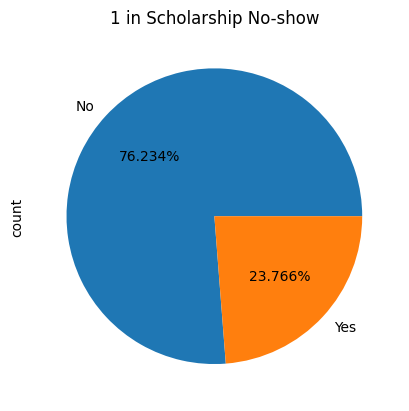

In [59]:
column_no_show('Scholarship',1)

Based on the pie chart above, we can see that around 76% of people who had scholarship attended their appointments while 23.7% missed their appointments

Now, for the people who had no scholarship, their pie chart is below

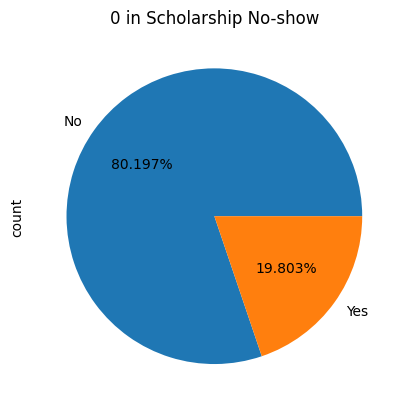

In [60]:
column_no_show('Scholarship',0)

from the pie chart above, we can see that 80% of the people who had no scholarship attended the appointments they had, and around 20% missed their appointments

<a id='conclusions'></a>
## Conclusions


1- Regarding the first question, we can clearly see that there's no difference in the attendance level between Males and Females since both of them have an attendance level of around 80%.  
2- Question 2, The neighbourhood "Parque Industrial" has a really high level of attendance of 100%, this impressive percentage requires further investigation to understand the demographics behind that neighbourhood and the reasons that helped achieving that high level.  
3- Question 3, In our data set, only 9.8% of the patients have had scholarship, of which 76% of patients attended their appointments, while the rest of our patients didn't have scholarship, their attendance rate was 4% higher of around 80% attendance rate, which can help us conclude that attendance rate for people who are paying for service is higher (not paying for the appointment might make the patient indifferent on missing the appointment).
<a id='limitation'></a>
### Limitations:  
1- The number of females in the dataset is way higher than males (71730 and 38597 respectively), the difference in the sample between males and females makes the calculations questionable, as its better to have similar number of samples between males and females to build more concrete conclusions.  
2- the data set is in the period between 2016-04-29 and 2016-06-08 which is less than 2 months, this will cause us to miss the ability to estimate if seasonality can affect the behavior of the patients within this dataset.  
3- In the neighbourhood question, the Parque Industrial had an attendance rate of 100%, when checking the count of observations in that neighbourhood we can see it's only 1, that's a very small number to build any conclusions regarding that neighbourhood, more observations are required or that neighbourhood should be excluded from our analysis
    

In [66]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html no_show.ipynb

[NbConvertApp] Converting notebook no_show.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 610213 bytes to no_show.html
